In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [4]:
ratings = pd.read_csv('https://drive.google.com/uc?id=1bXWiH1tqXpn73runZLGOjfqUYrRWIuzi')
ratings = pd.concat([ratings,
                      pd.read_csv('https://drive.google.com/uc?id=1LskyEBGK-DCHnrqbOIYqc8A2AzRoH0fy'),
                      pd.read_csv('https://drive.google.com/uc?id=1sHwR3CHXe4s0RSlcq3c83Ix12pxVZ6Yv'),
                      pd.read_csv('https://drive.google.com/uc?id=1jYUi_spkJYbbPJ5XuRKtf8I_DKcaP95N'),
                      pd.read_csv('https://drive.google.com/uc?id=1Ta8qx0kYkInr5KURq1A8gyfFqNqcQWGZ'),
                      pd.read_csv('https://drive.google.com/uc?id=1ZdEoc0n5-r44wXNBKfXmaO76NN9P5ErP'),
                      pd.read_csv('https://drive.google.com/uc?id=1ValM2b4d1u1oyrL3QqAkJMLkb4kJLNzo'),
                      pd.read_csv('https://drive.google.com/uc?id=13NU2TFaLksX-cG10R63u6xGtHxz69vlW'),],axis=0)

In [5]:
ratings.head()

,"<!DOCTYPE html><html><head><title>Google Drive - Virus scan warning</title><meta http-equiv=""content-type"" content=""text/html; charset=utf-8""/><style nonce=""d8gAxblYL2o5uIfm8U6TDw"">.goog-inline-block{position:relative;display:-moz-inline-box;display:inline-block}* html .goog-inline-block{display:inline}*:first-child+html .goog-inline-block{display:inline}.goog-link-button{position:relative;color:#15c;text-decoration:underline;cursor:pointer}.goog-link-button-disabled{color:#ccc;text-decoration:none;cursor:default}body{color:#222;font:normal 13px/1.4 arial",sans-serif;margin:0}.grecaptcha-badge{visibility:hidden}.uc-main{padding-top:50px;text-align:center}#uc-dl-icon{display:inline-block;margin-top:16px;padding-right:1em;vertical-align:top}#uc-text{display:inline-block;max-width:68ex;text-align:left}.uc-error-caption,".uc-warning-caption{color:#222;font-size:16px}#uc-download-link{text-decoration:none}.uc-name-size a{color:#15c;text-decoration:none}.uc-name-size a:visited{color:#61c;text-decoration:none}.uc-name-size a:active{color:#d14836;text-decoration:none}.uc-footer{color:#777;font-size:11px;padding-bottom:5ex;padding-top:5ex;text-align:center}.uc-footer a{color:#15c}.uc-footer a:visited{color:#61c}.uc-footer a:active{color:#d14836}.uc-footer-divider{color:#ccc;width:100%}sentinel{}</style><link rel=""icon"" href=""//ssl.gstatic.com/docs/doclist/images/drive_2022q3_32dp.png""/></head><body><div class=""uc-main""><div id=""uc-dl-icon"" class=""image-container""><div class=""drive-sprite-aux-download-file""></div></div><div id=""uc-text""><p class=""uc-warning-caption"">Google Drive can't scan this file for viruses.</p><p class=""uc-warning-subcaption""><span class=""uc-name-size""><a href=""/open?id=147PLCDh5ypYYF1pUpW_pi9GPA44nI2Fr"">rankings.csv</a> (305M)</span> is too large for Google to scan for viruses. Would you still like to download this file?</p><form id=""download-form"" action=""https://drive.google.com/uc?id=147PLCDh5ypYYF1pUpW_pi9GPA44nI2Fr&amp;confirm=t&amp;uuid=5b2b206b-0b1e-4c76-9ed8-65c647ef024a"" method=""post""><input type=""submit"" id=""uc-download-link"" class=""goog-inline-block jfk-button jfk-button-action"" value=""Download anyway""/></form></div></div><div class=""uc-footer""><hr class=""uc-footer-divider""></div></body></html>"


(0.0, 6.0)

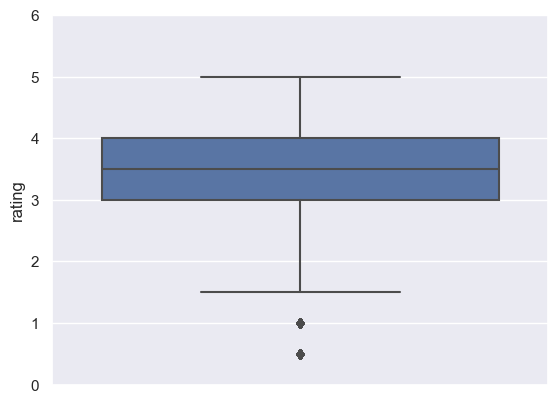

In [5]:
#Examinamos los valores de rating.
sns.boxplot(data=ratings,y='rating')
plt.ylim(0,6)

In [6]:
#Hay valores mas chicos a 1 lo que nos extraña.
ratings[ratings['rating']<1]

,userId,rating,date,movieId
24,1,0.5,2015-03-09,as7193
337,9,0.5,2003-08-26,as773
499,11,0.5,2009-01-11,as6617
507,11,0.5,2009-01-11,as493
907,15,0.5,2012-08-26,as9286
...,...,...,...,...
11023885,124365,0.5,2006-06-05,ns1177
11024007,124368,0.5,2013-04-12,ds1301
11024018,124370,0.5,2013-03-23,ns6104
11024019,124370,0.5,2013-03-23,ds546


In [7]:
#Aparentemente hay calificaciones de 0.5 también
ratings['rating'].unique()

array([1. , 4.5, 5. , 4. , 3.5, 2.5, 0.5, 3. , 2. , 1.5])

<AxesSubplot: >

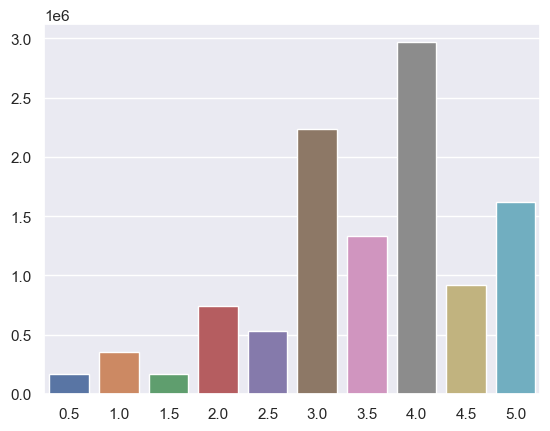

In [8]:
#Vemos en que cantidad hay
sns.barplot(x=ratings['rating'].value_counts().index,y=ratings['rating'].value_counts().values)

In [9]:
#Vamos a ver como es la distribución de votos por programa.
ratings.groupby(by='movieId').count().sort_values(by='userId')

,userId,rating,date
movieId,,,
as4940,396,396,396
ns2144,399,399,399
hs1711,401,401,401
ns6535,402,402,402
hs599,404,404,404
...,...,...,...
as6998,556,556,556
ns7279,558,558,558
as848,558,558,558


<AxesSubplot: ylabel='userId'>

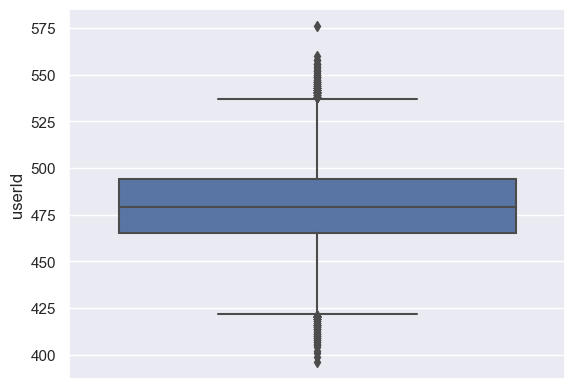

In [10]:
#Graficamos
sns.boxplot(data=ratings.groupby(by='movieId').count().sort_values(by='userId'),y='userId')

Hay entre 396 y 576 votos para cada título. El que más tiene cuenta con aproximadamente un 40% más de votos. Sin embargo todos los títulos tienen suficientes votos para ser considerados "recomendables".

In [11]:
#Vamos a ver como es la distribución de votos por usuario.
ratings.groupby(by='userId').count().sort_values(by='movieId')

,rating,date,movieId
userId,,,
114673,1,1,1
68407,1,1,1
68425,1,1,1
34901,1,1,1
13343,1,1,1
...,...,...,...
24025,4946,4946,4946
70648,5356,5356,5356
270123,7638,7638,7638


<AxesSubplot: ylabel='movieId'>

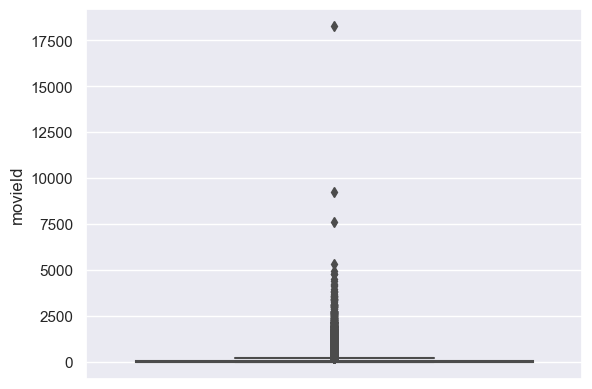

In [12]:
#Graficamos
sns.boxplot(data=ratings.groupby(by='userId').count().sort_values(by='movieId'),y='movieId')

(0.0, 300.0)

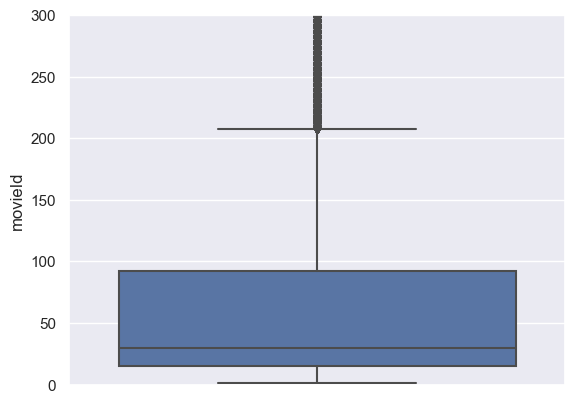

In [13]:
#Vemos más de cerca los valores medios
sns.boxplot(data=ratings.groupby(by='userId').count().sort_values(by='movieId'),y='movieId')
plt.ylim(0,300)

Acá si se observa algo interesante. Hay muchos usuarios con muy pocos votos. También hay un usuario en particular (45811) que realizó valoraciones en mas de **18.000** títulos. Esto es igual a la suma de todos los titulos de netflix y amazon. Teniendo en cuenta que solo hay alrededor de 22.000 títulos en total, este usuario llama mucho la atención.

In [14]:
#Observamos este usuario mas de cerca.
ratings[ratings['userId']==45811]

,userId,rating,date,movieId
4439700,45811,4.0,2015-12-15,hs678
4439701,45811,3.0,2016-09-07,ns5769
4439702,45811,4.0,2015-12-15,ns3783
4439703,45811,2.5,2016-12-24,ds813
4439704,45811,3.0,2017-01-29,hs2294
...,...,...,...,...
4457971,45811,3.0,2017-07-25,ns4912
4457972,45811,2.0,2017-07-25,ds724
4457973,45811,1.5,2017-07-25,as6115
4457974,45811,2.5,2017-07-25,as2478


In [15]:
#Vemos si votó más de una vez un programa
ratings[ratings['userId']==45811]['movieId'].unique().size

12619

In [16]:
#Vemos que programas voto más de una vez.
df_45811 = ratings[ratings['userId']==45811]
df_45811.groupby(by='movieId').count().sort_values(by='userId',ascending=False)

,userId,rating,date
movieId,,,
as5670,7,7,7
ns1103,6,6,6
ds1245,6,6,6
ns728,6,6,6
as1479,6,6,6
...,...,...,...
as9312,1,1,1
as9313,1,1,1
as9314,1,1,1


In [17]:
#Hay un programa que fue votado 7 veces por este usuario. Vamos a ver con que valoraciones.
df_45811[df_45811['movieId']=='as5670']

,userId,rating,date,movieId
4442939,45811,2.5,2016-12-02,as5670
4443606,45811,3.5,2016-02-14,as5670
4445076,45811,5.0,2016-11-15,as5670
4447107,45811,3.0,2016-02-14,as5670
4450176,45811,2.0,2015-12-15,as5670
4451964,45811,3.0,2016-02-14,as5670
4452832,45811,1.0,2016-04-26,as5670


El usuario califico con valoraciones de 1 hasta 5 el mismo programa a lo largo de 2016. No sabemos si este usuario es un bot, una persona que cambia mucho de parecer o usan varias personas la misma cuenta pero lo cierto es que esta información va a confundir al modelo.

In [18]:
#Vamos a ver si otro usuario hizo lo mismo.
ratings[ratings['userId']==8659]

,userId,rating,date,movieId
841647,8659,4.0,2001-08-05,ns905
841648,8659,4.0,2001-08-07,as7281
841649,8659,3.0,2001-08-07,ds292
841650,8659,3.0,2001-08-07,as7630
841651,8659,3.0,2001-08-07,as6470
...,...,...,...,...
850921,8659,2.5,2015-05-19,ns3471
850922,8659,0.5,2015-12-24,as127
850923,8659,3.0,2015-08-08,ns4359
850924,8659,4.0,2015-08-08,as1682


In [19]:
ratings[ratings['userId']==8659]['movieId'].unique().size

7670

In [20]:
#También sucede lo mismo. Vemos que programas valoró más de una vez
df_8659 = ratings[ratings['userId']==8659]
df_8659.groupby(by='movieId').count().sort_values(by='userId',ascending=False)

,userId,rating,date
movieId,,,
as3071,4,4,4
ns149,4,4,4
ns7861,4,4,4
as5752,4,4,4
ds415,4,4,4
...,...,...,...
as8566,1,1,1
as8557,1,1,1
as8556,1,1,1


In [21]:
df_8659.groupby(by='movieId').count().sort_values(by='userId',ascending=False).head(10)

,userId,rating,date
movieId,,,
as3071,4,4,4
ns149,4,4,4
ns7861,4,4,4
as5752,4,4,4
ds415,4,4,4
ns3866,4,4,4
as8278,4,4,4
ns5483,4,4,4
as4163,4,4,4


In [22]:
#Vemos las valoraciones del programa as8278
df_8659[df_8659['movieId']=='as8278']

,userId,rating,date,movieId
842702,8659,2.0,2001-08-26,as8278
843676,8659,4.5,2003-05-31,as8278
844301,8659,3.5,2003-12-02,as8278
844895,8659,3.0,2001-08-06,as8278


De nuevo. Vemos que vota de 2 a 4.5 el mismo programa. En este caso habría que definir un criterio pero existen 2 posibilidades.

    - Eliminar todos los registros del usuario
    
    - Dejar unicamente los últimos registros

Por una cuestión de simplicidad y porque cuando probamos el modelo de ML vimos que no es posible utilizar todos los datos vamos a elegir el primero.

In [23]:
#Creamos función que identifique a los usuarios que votaron más de una vez el mismo titulo.
def usuariosVotosMultiples(lista_de_usuarios):
    lista_multiples = []
    for i in lista_de_usuarios:
        df_usuario = ratings[ratings['userId']==i]
        if df_usuario.shape[0] > df_usuario['movieId'].unique().size:
            lista_multiples.append(i)
    return lista_multiples

Para no pasar una lista con todos los usuarios (son 115.000) vamos a pasar una parte nomas. Los usuarios con más de 500 votos que hayan votado mas de 1 vez el mismo show van a ser eliminados.

In [24]:
#Definimos un dataframe auxiliar para trabajar más comodos.
df_dist_x_usuario = ratings.groupby(by='userId').count().sort_values(by='movieId')
df_dist_x_usuario

,rating,date,movieId
userId,,,
114673,1,1,1
68407,1,1,1
68425,1,1,1
34901,1,1,1
13343,1,1,1
...,...,...,...
24025,4946,4946,4946
70648,5356,5356,5356
270123,7638,7638,7638


In [25]:
#Definimos el segmemnto a revisar.
df_dist_x_usuario[df_dist_x_usuario['rating']>500]

,rating,date,movieId
userId,,,
36540,501,501,501
119993,501,501,501
9330,501,501,501
9454,501,501,501
71117,501,501,501
...,...,...,...
24025,4946,4946,4946
70648,5356,5356,5356
270123,7638,7638,7638


In [26]:
#Definimos lista a eliminar
lista_a_eliminar = usuariosVotosMultiples(df_dist_x_usuario[df_dist_x_usuario['rating']>500].index.values)
len(lista_a_eliminar)

4000

In [27]:
#Vemos cuantos registros van a ser eliminados (hay que descontarle el unico usuario que no voto al mismo programa)
ratings[ratings['userId'].isin(lista_a_eliminar)]

,userId,rating,date,movieId
1710,24,4.0,2001-01-19,as6877
1711,24,3.0,2001-01-20,as7534
1712,24,4.0,2001-01-19,as284
1713,24,3.0,2001-01-19,ns5911
1714,24,3.0,2001-01-20,ns776
...,...,...,...,...
11022151,124325,3.0,2017-03-28,as6658
11022152,124325,4.5,2017-03-28,as3244
11022153,124325,4.5,2017-03-31,ds1045
11022154,124325,4.5,2017-03-27,as8821


Se van a eliminar mas de 3.000.000 de registros. Casi un 30% del dataset. Esta decisión no debiera tomarse de esta manera en un caso real. Se hace para reducir el costo computacional del modelo de Machine Learning.

In [28]:
#Eliminamos los registros en cuestión
ratings.drop(index=ratings[ratings['userId'].isin(lista_a_eliminar)].index.values,inplace=True)

In [29]:
#Vemos cuantos registros quedaron
ratings.shape

(7382894, 4)

Redujimos considerablemente el tamaño del dataframe pero a un costo grande. Se perdió mucha data. Se repite por última vez que esto solo se hace para mejorar la performance computacional del modelo.

In [30]:
#Continuamos analizando cuantos usuarios votaron menos de 5 veces.
df_aux = ratings.groupby(by='userId').count().sort_values(by='movieId')
df_aux[df_aux['movieId']<5]

,rating,date,movieId
userId,,,
4237,1,1,1
77312,1,1,1
252688,1,1,1
74882,1,1,1
260622,1,1,1
...,...,...,...
64344,4,4,4
19222,4,4,4
263373,4,4,4


Sobre estos 6.310 usuarios si podríamos quizás decir que tenemos poca información y deben ser eliminados para mejorar la precisión del modelo. Así se va a proceder.

In [31]:
lista_usuario_pocos_votos = df_aux[df_aux['movieId']<5].index
lista_usuario_pocos_votos

Int64Index([  4237,  77312, 252688,  74882, 260622,  21440,  46542,  40172,
              3308, 266056,
            ...
            115724,   5696,      6,  64617, 258125,  64344,  19222, 263373,
             64377,     39],
           dtype='int64', name='userId', length=6310)

In [32]:
#Vemos cuantos registros se van a eliminar
ratings[ratings['userId'].isin(lista_usuario_pocos_votos)]

,userId,rating,date,movieId
147,6,3.0,1999-12-11,hs2265
148,6,3.0,1999-12-11,ds1035
149,6,4.0,1999-12-11,hs3022
150,6,5.0,1999-12-11,ns632
3333,39,1.5,2016-04-30,ns7932
...,...,...,...,...
11023425,124356,4.0,1999-09-29,ds1057
11023426,124356,5.0,1999-09-29,ns4846
11024237,124378,3.0,2013-10-09,ns6406
11024238,124378,3.5,2013-10-09,as7321


In [33]:
#Eliminamos los registros en cuestión
ratings.drop(index=ratings[ratings['userId'].isin(lista_usuario_pocos_votos)].index.values,inplace=True)

In [34]:
#Exportamos el dataframe resultante a formato parquet para que sea más liviano
import pyarrow
ratings.to_parquet('ratings.parquet',index=False)